In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ns    Nf       x     y    z          H 

900   1e6   -162    13   55    1808450
900   1e7   -220   -13   81   19017500
900   1e8   -252  -169  159  194487000
---------------------------------------
900   1e5   -100    -2   -7     
900   1e6   -174    -4  -19       -823
900   1e7   -264   -79  -18       -847
900   1e8   -358  -239  -58       -858

In [120]:
Nflips = 1e6
ndims = 2
x,y,z,sx,sy,sz,H = np.loadtxt('seq_out.txt').T
S = (sx**2+sy**2+sz**2)**0.5
Nspins = len(S)
Side = int(np.round((Nspins)**(1/ndims)))
print('Total energy of system',H.sum()*0.5)
print(f'Total x spin: {np.sum(sx):.1f}\nTotal y spin: {np.sum(sy):.1f}\nTotal z spin: {np.sum(sz):.1f}')
print('Number of spins: ',len(S))

Total energy of system -868.9725799999999
Total x spin: -220.5
Total y spin: -13.7
Total z spin: 81.6
Number of spins:  900


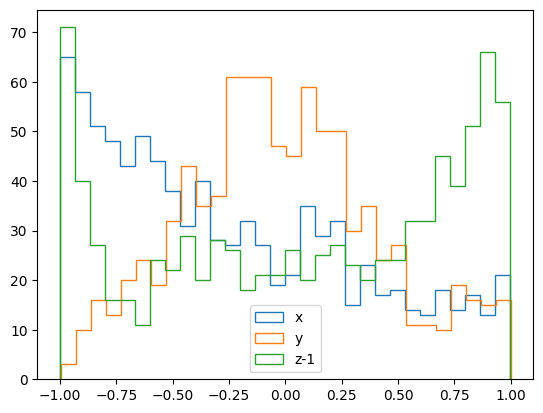

In [121]:
#plt.hist(S,300,histtype = 'step');
#plt.yscale('log')
#plt.show()
plt.hist(sx,bins = int(np.sqrt(Nspins)),histtype = 'step',label = 'x');
plt.hist(sy,bins = int(np.sqrt(Nspins)),histtype = 'step',label = 'y');
plt.hist(sz,bins = int(np.sqrt(Nspins)),histtype = 'step',label = 'z-1');


plt.legend()

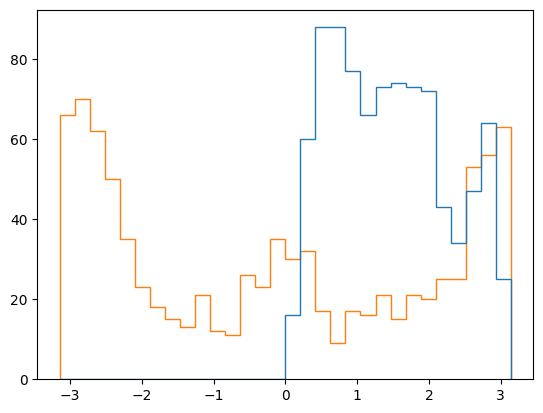

In [122]:
plt.hist([np.arccos(sz/S),np.sign(sy)*np.arccos(sx/np.sqrt(sx**2+sy**2))],bins = int(np.sqrt(Nspins)),histtype='step',label = ['theta','phi']);


In [123]:
if ndims == 2:
    xx = sx.reshape((Side,Side))
    yy = sy.reshape((Side,Side))
    zz = sz.reshape((Side,Side))
elif ndims == 3:
    xx = sx.reshape((Side,Side,Side))
    yy = sy.reshape((Side,Side,Side))
    zz = sz.reshape((Side,Side,Side))

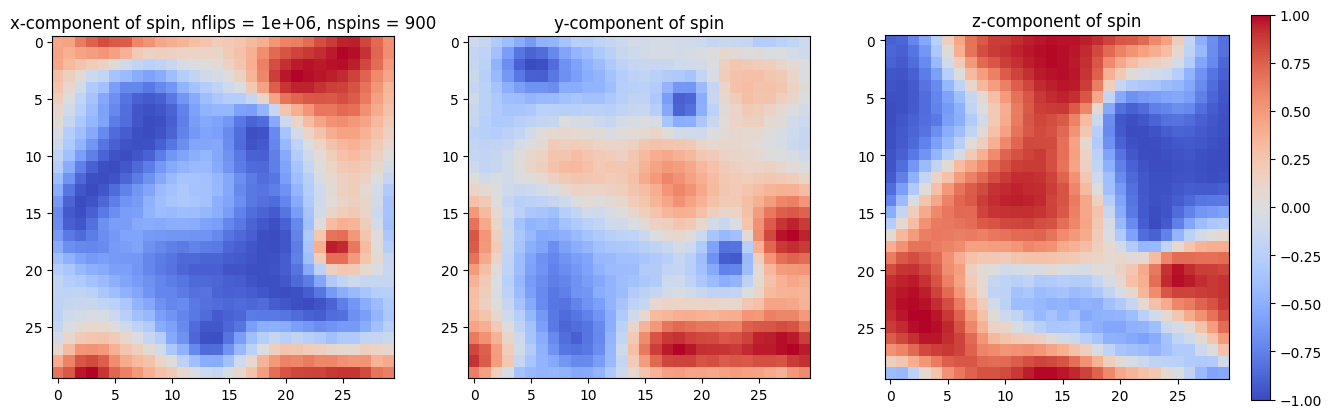

In [124]:
fig,ax = plt.subplots(1,3,figsize = (16.3,5),gridspec_kw ={'width_ratios':[5,5,6.3]})
if ndims == 2:
    ax[0].imshow(xx,cmap = 'coolwarm',vmin = -1,vmax = 1)
    ax[1].imshow(yy,cmap = 'coolwarm',vmin = -1,vmax = 1)
    im2=ax[2].imshow(zz,cmap = 'coolwarm',vmin = -1,vmax = 1)
elif ndims == 3:
    ax[0].imshow(xx[Side//2],cmap = 'coolwarm',vmin = -1,vmax = 1)
    ax[1].imshow(yy[Side//2],cmap = 'coolwarm',vmin = -1,vmax = 1)
    im2=ax[2].imshow(zz[Side//2],cmap = 'coolwarm',vmin = -1,vmax = 1)
    
ax[0].set_title(f'x-component of spin, nflips = {Nflips:.0e}, nspins = {Nspins}')
ax[1].set_title('y-component of spin')
ax[2].set_title('z-component of spin')
fig.colorbar(im2,ax = ax[2])
plt.savefig('xcomp.png')

In [57]:
Nsize = np.arange(1,21)*10
Nexp = 100000
#Counts = np.zeros((len(Nsize),Nexp))
for isize in range(16,len(Nsize)):
    N = Nsize[isize]
    for iexp in range(Nexp):
        grid = np.zeros((N,N))
        counter = 0
        while True:
            rand_coord = np.random.randint(low = 0,high = N,size = 2)
            if not grid[rand_coord[0],rand_coord[1]]:
                grid[rand_coord[0],rand_coord[1]] = 1
                grid[np.max([rand_coord[0]-1,0]),rand_coord[1]] = 1
                grid[np.min([rand_coord[0]+1,N-1]),rand_coord[1]] = 1
                grid[rand_coord[0],np.max([rand_coord[1]-1,0])] = 1
                grid[rand_coord[0],np.min([rand_coord[1]+1,N-1])] = 1
                counter += 1
            else:
                Counts[isize,iexp] = counter
                break
    print(N)


170
180
190
200


In [58]:
two_sigma_limits = np.quantile(Counts,0.045,axis = 1)
two_sigma_limits

array([ 1.,  3.,  4.,  5.,  7.,  8.,  9., 11., 12., 14., 15., 16., 18.,
       19., 21., 22., 23., 24., 26., 27.])

#### Ndims,   Side Length, 2 sigma of not hitting a neighbour
2     10     1
2     20     3
2     30     4
2     40     5
2     50     7
2     60     8
2     70     9
2     80     11
2     90     12
2    100     14
2    110     15
2    120     16
2    130     18
2    140     19
2    150     21
2    160     22
2    170     23
2    180     24
2    190     26
2    200     27

[(0.0, 1.05)]

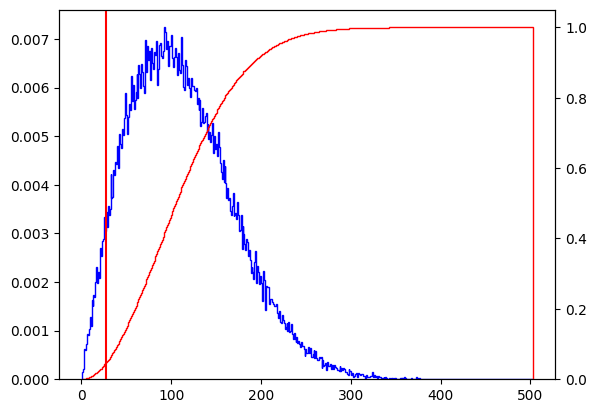

In [94]:
fig,ax = plt.subplots()
n=19
Array = Counts[n]
bins = np.arange(np.max(Array)-np.min(Array)+1)+np.min(Array)-0.5
ax.hist(Array,bins,histtype = 'step',density = True,color = 'b');
ax1 = ax.twinx()
ax1.hist(Array,bins,histtype = 'step',density = True,cumulative = True,color = 'r');
ax1.vlines(two_sigma_limits[n],0,1.1,color = 'r')
ax1.set(ylim=(0,1.05))

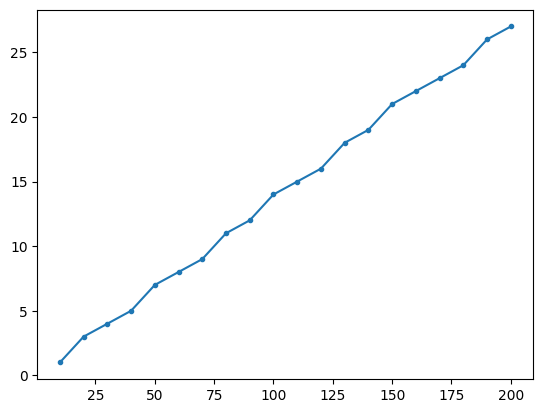

In [61]:
plt.plot(Nsize,two_sigma_limits,'.-')